<a href="https://colab.research.google.com/github/chin2yere/FDSfE_COffor/blob/main/class_work/classwork_18thOctober.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np

In [7]:
wbdat = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/wbank_US_leb.csv")

In [14]:
wbdat.head()

,year,leb
0,1960,69.770732
1,1961,70.270732
2,1962,70.119512
3,1963,69.917073
4,1964,70.165854


In [15]:
wbdat.tail()

,year,leb
55,2015,78.690244
56,2016,78.539024
57,2017,78.539024
58,2018,78.639024
59,2019,78.787805


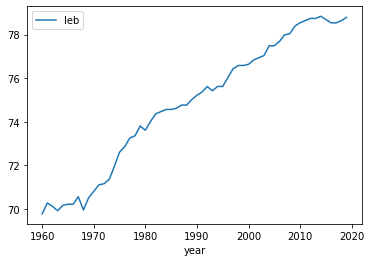

In [9]:
import pylab as plt
wbdat.plot("year", "leb");
plt.ylabel("")


In [12]:
def sumsqerr(y_obs, y_pred):
  return((y_obs-y_pred)**2).sum()

In [13]:
# -- extract the X and Y variables into separate arrays
X = wbdat["year"].values
Y = wbdat["leb"].values
# -- set the initial values for slope and intercept
slope = [0.1]
intercept = [-250]
# -- set the learning rate (step size)
Lrate = 1e-9
# -- set the number of iterations to perform gradient descent
epochs = 20
# -- create a list to use for saving SSE values
Y_pred = slope[-1] * X + intercept[-1]
sse = [sumsqerr(Y, Y_pred)]
# -- perform Gradient Descent
for i in range(epochs):
  # -- calculate the gradients for slope and intercept
  D_m = -2 * sum(X * (Y - Y_pred))  # Derivative wrt slope
  D_c = -2 * sum(Y - Y_pred)  # Derivative wrt intercept
  # -- calculate and update the new slope and intercept
  slope.append(slope[-1] - Lrate * D_m)
  intercept.append(intercept[-1] - Lrate * D_c)
  # -- calculate the new predicted value of Y
  Y_pred = slope[-1] * X + intercept[-1]
  # -- calculate and add the new SSE to list
  sse.append(sumsqerr(Y, Y_pred))









In [21]:
print("The final model for predicting life expectancy is")
print("leb={0:.3}*year + {1:1f}".format(slope[-1], intercept[-1]))

The final model for predicting life expectancy is
leb=0.163*year + -249.999968


In [58]:
def rsquared(n,xy,x,y,xsq,ysq):
 red=((n*(xy))-(x*y))/((((n*xsq)-xsq)*((n*ysq)-ysq))**(0.5));
 return red**2

In [60]:
sumXY=(X*Y).sum()
sumXsq=(X*X).sum()
sumYsq=(Y*Y).sum()
sumX=X.sum()
sumY=Y.sum()
N=X.size
Rsq= rsquared(N,sumXY,sumX,sumY,sumXsq,sumYsq);
print("The R-squared value for the data is {0}".format(Rsq))


The R-squared value for the data is 1.204864085041871e-07


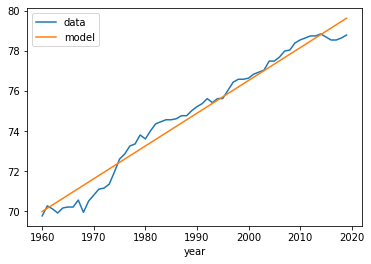

In [24]:
ax=wbdat.plot("year", "leb", label="data");
x=np.arange(1960, 2020, 1)
y=slope[-1]*x +intercept[-1]
ax.plot(x,y,label="model")
ax.legend()

In [25]:
slope

[0.1,
 0.1300494933902439,
 0.14582519675815392,
 0.15410729368140766,
 0.15845531721143294,
 0.160737988954223,
 0.16193637029908148,
 0.16256550931228833,
 0.1628958014180963,
 0.1630692016887472,
 0.163160235211309,
 0.16320802696042871,
 0.16323311718236905,
 0.1632462893145723,
 0.16325320456097844,
 0.16325683500078034,
 0.16325874094779508,
 0.16325974155220332,
 0.163260266860199,
 0.1632605426420174,
 0.16326068742492328]

In [26]:
intercept

[-250,
 -249.99998489721463,
 -249.99997696844713,
 -249.999972805972,
 -249.9999706207652,
 -249.99996947360577,
 -249.99996887141157,
 -249.999968555319,
 -249.9999683894271,
 -249.99996830238916,
 -249.99996825674882,
 -249.9999682328418,
 -249.9999682203446,
 -249.99996821383746,
 -249.99996821047503,
 -249.99996820876353,
 -249.99996820791878,
 -249.99996820752904,
 -249.99996820737817,
 -249.99996820735274,
 -249.99996820739312]

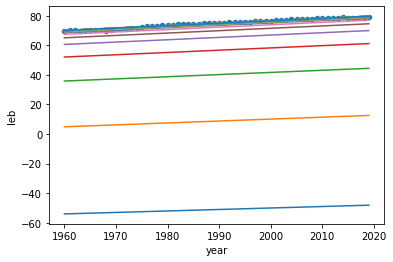

In [27]:
ax= wbdat.plot("year","leb", kind="scatter")
x=np.arange(1960,2020,1)
for a,b in zip(slope, intercept):
  y=a*x +b
  ax.plot(x,y)

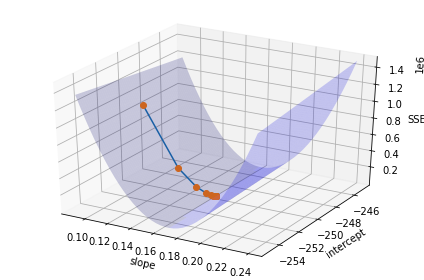

In [28]:
# -- plot the SSE surface and the gradient descent’s search for best slope and intercept
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot(slope, intercept, sse)
ax.plot(slope, intercept, sse, 'o')
ax.set_xlabel("slope")
ax.set_ylabel("intercept")
ax.set_zlabel("SSE")
def error(X, Y, THETA):
    Y_pred = THETA[1]*X + THETA[0]
    return np.sum((Y_pred - Y)**2)
ms = np.linspace(0.09, 0.24, 40)
bs = np.linspace(-255, -245, 60)
M, B = np.meshgrid(ms, bs)
zs = np.array([error(X, Y, theta)
               for theta in zip(np.ravel(B), np.ravel(M))])
Z = zs.reshape(M.shape)
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
fig.tight_layout()
plt.show()







